In [1]:
from CovidRawDataManager import CovidRawDataManager
import seaborn as sns

## Init manager (i.e. load data)

In [2]:
covid_raw_data_manager = CovidRawDataManager()

### Checkout total US cases data

In [3]:
covid_raw_data_manager.covid_us_df

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
1027,2022-11-13,97750732,1070406
1028,2022-11-14,97800757,1070612
1029,2022-11-15,97833821,1070970
1030,2022-11-16,97919104,1071730


In [4]:
covid_raw_data_manager.covid_us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1032 non-null   object
 1   cases   1032 non-null   int64 
 2   deaths  1032 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.3+ KB


In [13]:
covid_raw_data_manager.covid_us_df.describe()

,cases,deaths
count,1.032000e+03,1.032000e+03
mean,4.104152e+07,5.714125e+05
std,3.339708e+07,3.598999e+05
min,1.000000e+00,0.000000e+00
25%,7.492385e+06,2.099278e+05
50%,3.350731e+07,6.013990e+05
75%,7.915002e+07,9.569868e+05
max,9.799042e+07,1.072285e+06


### Plot generic trends in total US cases

<AxesSubplot: xlabel='date'>

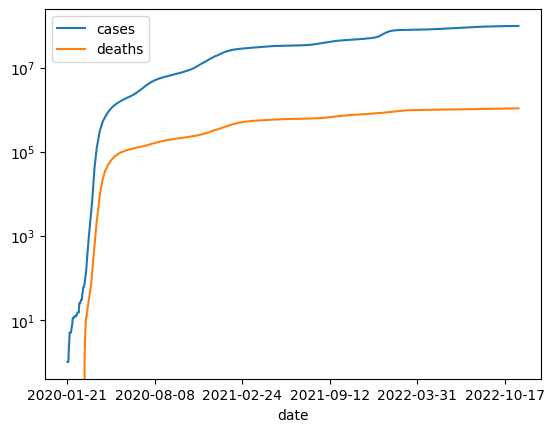

In [5]:
covid_raw_data_manager.covid_us_df.plot(x="date", y=["cases", "deaths"], logy=True)

### Checkout US state covid data

In [6]:
covid_raw_data_manager.covid_us_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54886 entries, 0 to 54885
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    54886 non-null  object
 1   state   54886 non-null  object
 2   fips    54886 non-null  int64 
 3   cases   54886 non-null  int64 
 4   deaths  54886 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ MB


In [14]:
covid_raw_data_manager.covid_us_states_df.describe()

,fips,cases,deaths
count,54886.000000,5.488600e+04,54886.000000
mean,32.210965,7.716877e+05,10744.046442
std,18.773044,1.305379e+06,16160.386552
min,1.000000,1.000000e+00,0.000000
25%,17.000000,5.741000e+04,959.000000
50%,31.000000,3.014945e+05,4426.000000
75%,46.000000,9.091582e+05,13514.750000
max,78.000000,1.144656e+07,97320.000000


In [7]:
covid_raw_data_manager.covid_us_states_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
54881,2022-11-17,Virginia,51,2136700,22270
54882,2022-11-17,Washington,53,1849372,14740
54883,2022-11-17,West Virginia,54,612047,7569
54884,2022-11-17,Wisconsin,55,1914266,15563


### Process statewise trends

In [8]:
statewise_cases_df = covid_raw_data_manager.generate_statewise_history_data(states_df_label="cases")
statewise_cases_df

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-25,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,1540329,298969,8257,2300375,963740,11411720,1692864,918761,314684,170482,...,2312489,7952522,1051549,145838,23445,2131894,1844567,610675,1909301,179366
2022-11-14,1540329,298969,8257,2300375,963829,11416309,1695579,918876,315119,170482,...,2312489,7960274,1051549,145838,23445,2133781,1844567,611358,1909301,179366
2022-11-15,1540329,299411,8257,2300375,964227,11417891,1697542,919722,315172,170482,...,2312489,7960607,1051549,145838,23445,2134790,1845365,611586,1912209,179838


In [15]:
statewise_cases_df.describe()

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,1.032000e+03,1032.000000,1032.000000,1.032000e+03,1032.000000,1.032000e+03,1.032000e+03,1032.000000,1032.000000,1032.000000,...,1.032000e+03,1.032000e+03,1.032000e+03,1032.000000,1032.000000,1.032000e+03,1.032000e+03,1032.000000,1.032000e+03,1032.000000
mean,6.729075e+05,114678.420543,1607.774225,1.030716e+06,425661.460271,4.668813e+06,6.862303e+05,388373.662791,131443.739341,68541.945736,...,1.017541e+06,3.497737e+06,4.750693e+05,49706.701550,7780.144380,8.519912e+05,6.924572e+05,234248.647287,8.193228e+05,78458.586240
std,5.244847e+05,107217.346703,2967.930513,8.002402e+05,334455.656464,3.865912e+06,5.853491e+05,310020.829406,108808.208573,58681.500434,...,7.972328e+05,2.723041e+06,3.716171e+05,54253.018747,8126.846514,7.186497e+05,6.461767e+05,215017.952316,6.535570e+05,64304.293791
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.595770e+05,9458.250000,0.000000,2.210075e+05,87325.750000,8.369505e+05,7.386900e+04,58914.250000,21333.000000,15540.000000,...,2.000178e+05,8.055112e+05,7.845425e+04,1809.000000,1324.000000,1.523852e+05,9.403325e+04,16713.500000,1.413202e+05,6597.750000
50%,5.486570e+05,70285.000000,0.000000,8.895345e+05,345538.500000,3.808410e+06,5.568545e+05,348665.000000,109538.000000,49243.000000,...,8.531040e+05,2.979486e+06,4.115555e+05,24360.000000,3752.000000,6.786220e+05,4.491390e+05,163382.000000,6.768850e+05,61490.000000
75%,1.282945e+06,239242.000000,218.500000,1.980769e+06,822376.500000,9.001919e+06,1.323674e+06,724833.000000,257094.000000,134678.000000,...,1.962909e+06,6.578853e+06,9.244360e+05,113107.000000,15426.000000,1.645791e+06,1.430901e+06,492276.000000,1.574810e+06,155426.000000
max,1.542227e+06,299411.000000,8262.000000,2.311150e+06,964886.000000,1.144656e+07,1.700235e+06,920500.000000,315440.000000,170750.000000,...,2.318836e+06,7.964763e+06,1.054340e+06,146143.000000,23445.000000,2.136700e+06,1.849372e+06,612047.000000,1.914266e+06,179838.000000


In [9]:
statewise_deaths_df = covid_raw_data_manager.generate_statewise_history_data(states_df_label="deaths")
statewise_deaths_df

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,20608,1369,34,31613,12525,97142,13685,11537,3148,1402,...,27914,91497,5076,763,124,22232,14685,7538,15522,1917
2022-11-14,20608,1369,34,31613,12525,97169,13690,11537,3161,1402,...,27914,91532,5076,763,124,22232,14685,7557,15522,1917
2022-11-15,20608,1385,34,31613,12526,97176,13702,11549,3163,1402,...,27914,91533,5076,763,124,22233,14686,7557,15537,1924


In [16]:
statewise_deaths_df.describe()

state,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,10726.149225,551.379845,6.554264,16630.768411,6097.222868,52960.239341,6995.013566,7348.384690,1652.048450,950.994186,...,13175.488372,49537.094961,2458.695736,316.816860,54.972868,10838.651163,6815.136628,3330.435078,7733.902132,887.958333
std,7483.907315,502.550482,12.808178,11085.408731,4380.117786,34569.206839,4596.074453,3363.051572,1040.724148,423.252557,...,9962.604546,33349.607159,1824.391339,253.398867,45.338272,7572.428871,4834.863189,2744.950599,5429.489878,725.039891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2558.750000,54.000000,0.000000,5706.750000,1441.500000,16171.750000,2083.000000,4516.000000,645.000000,631.000000,...,2565.000000,16507.000000,481.750000,58.000000,20.000000,3275.250000,2249.500000,360.250000,1391.750000,53.000000
50%,11306.000000,356.000000,0.000000,17840.500000,5874.000000,63338.500000,6876.000000,8270.000000,1682.500000,1141.000000,...,12415.000000,52286.500000,2329.000000,256.000000,30.000000,11347.000000,5881.000000,2863.000000,8047.000000,734.000000
75%,18480.000000,1155.000000,0.000000,27947.000000,10685.500000,86357.250000,12049.500000,10542.250000,2722.500000,1321.000000,...,24414.750000,85719.500000,4453.000000,607.000000,109.000000,18955.000000,12098.000000,6440.000000,13489.000000,1741.000000
max,20617.000000,1385.000000,34.000000,31647.000000,12530.000000,97320.000000,13727.000000,11559.000000,3163.000000,1403.000000,...,27952.000000,91552.000000,5089.000000,763.000000,124.000000,22270.000000,14740.000000,7569.000000,15563.000000,1924.000000


### plot few state trends

<AxesSubplot: xlabel='date', ylabel='cases'>

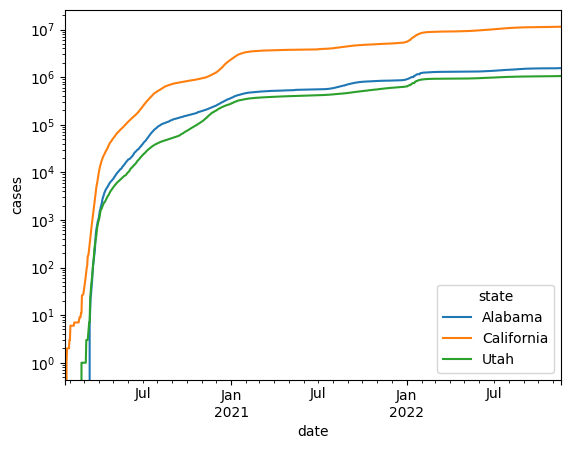

In [10]:
test_state_list = ["Alabama", "California", "Utah"]
statewise_cases_df.plot(y=test_state_list, logy=True, ylabel="cases")

<AxesSubplot: xlabel='date', ylabel='deaths'>

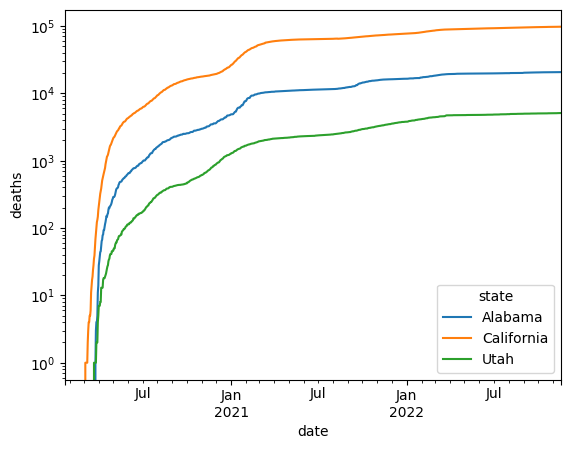

In [11]:
statewise_deaths_df.plot(y=test_state_list, logy=True, ylabel="deaths")

### check correlation between different states for cases and deaths

<AxesSubplot: xlabel='state', ylabel='state'>

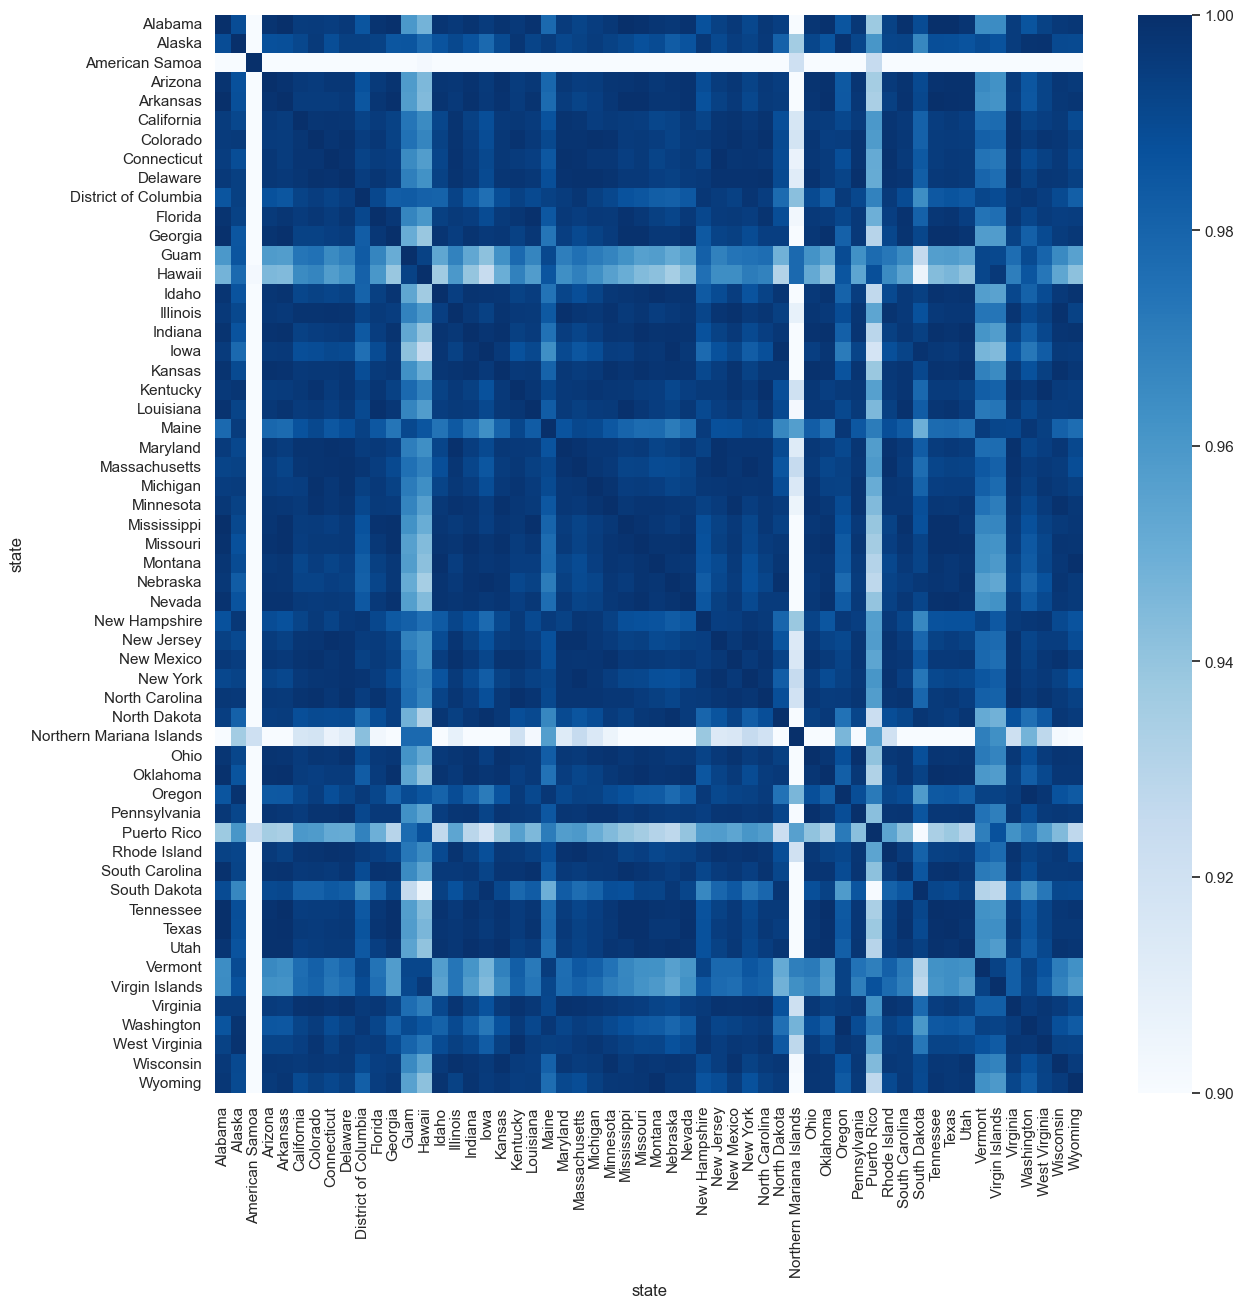

In [12]:
cases_statewise_corr_matrix = statewise_cases_df.corr()
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(cases_statewise_corr_matrix, xticklabels=cases_statewise_corr_matrix.columns, 
            yticklabels=cases_statewise_corr_matrix.columns, vmin=0.9, cmap="Blues")

<AxesSubplot: xlabel='state', ylabel='state'>

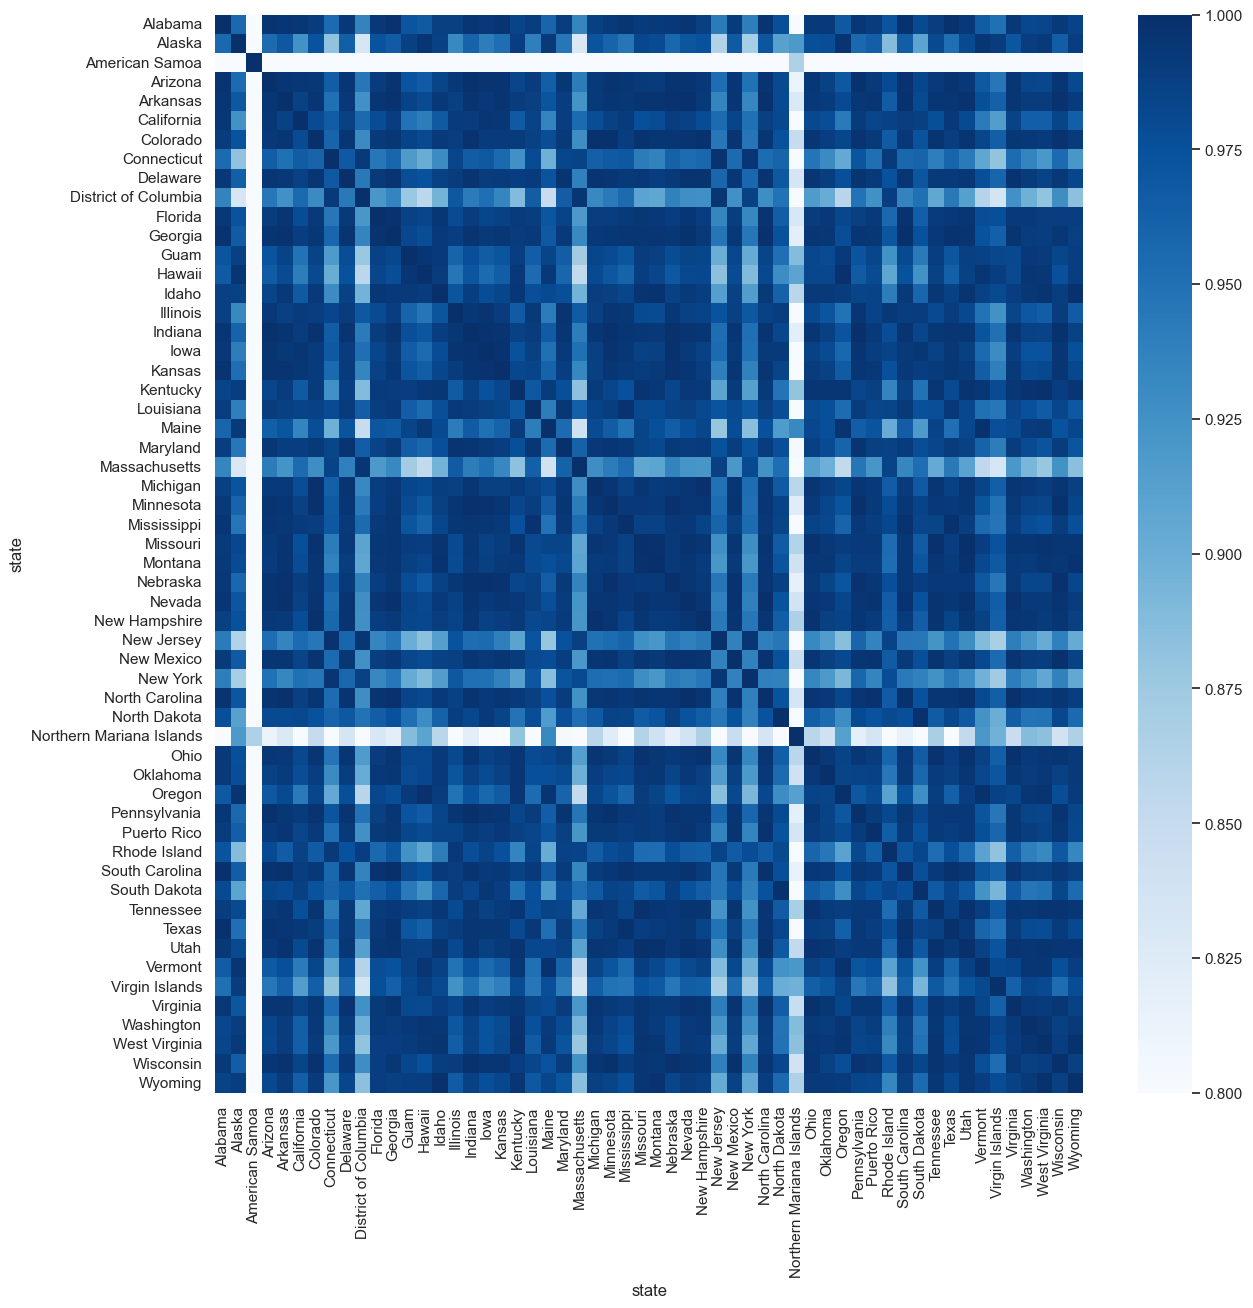

In [13]:
deaths_statewise_corr_matrix = statewise_deaths_df.corr()
sns.heatmap(deaths_statewise_corr_matrix, xticklabels=deaths_statewise_corr_matrix.columns, 
            yticklabels=deaths_statewise_corr_matrix.columns, vmin=0.8, cmap="Blues")

### Remove non mainland states to see correlations

In [15]:
exclude_states = [
    "Alaska",
    "Hawaii",
    "Guam",
    "Puerto Rico",
    "Virgin Islands",
    "Northern Mariana Islands",
    "American Samoa",
]
mainland_statewise_deaths_df = statewise_deaths_df.loc[:, ~statewise_deaths_df.columns.isin(exclude_states)]
mainland_statewise_cases_df = statewise_cases_df.loc[:, ~statewise_cases_df.columns.isin(exclude_states)]

<AxesSubplot: xlabel='state', ylabel='state'>

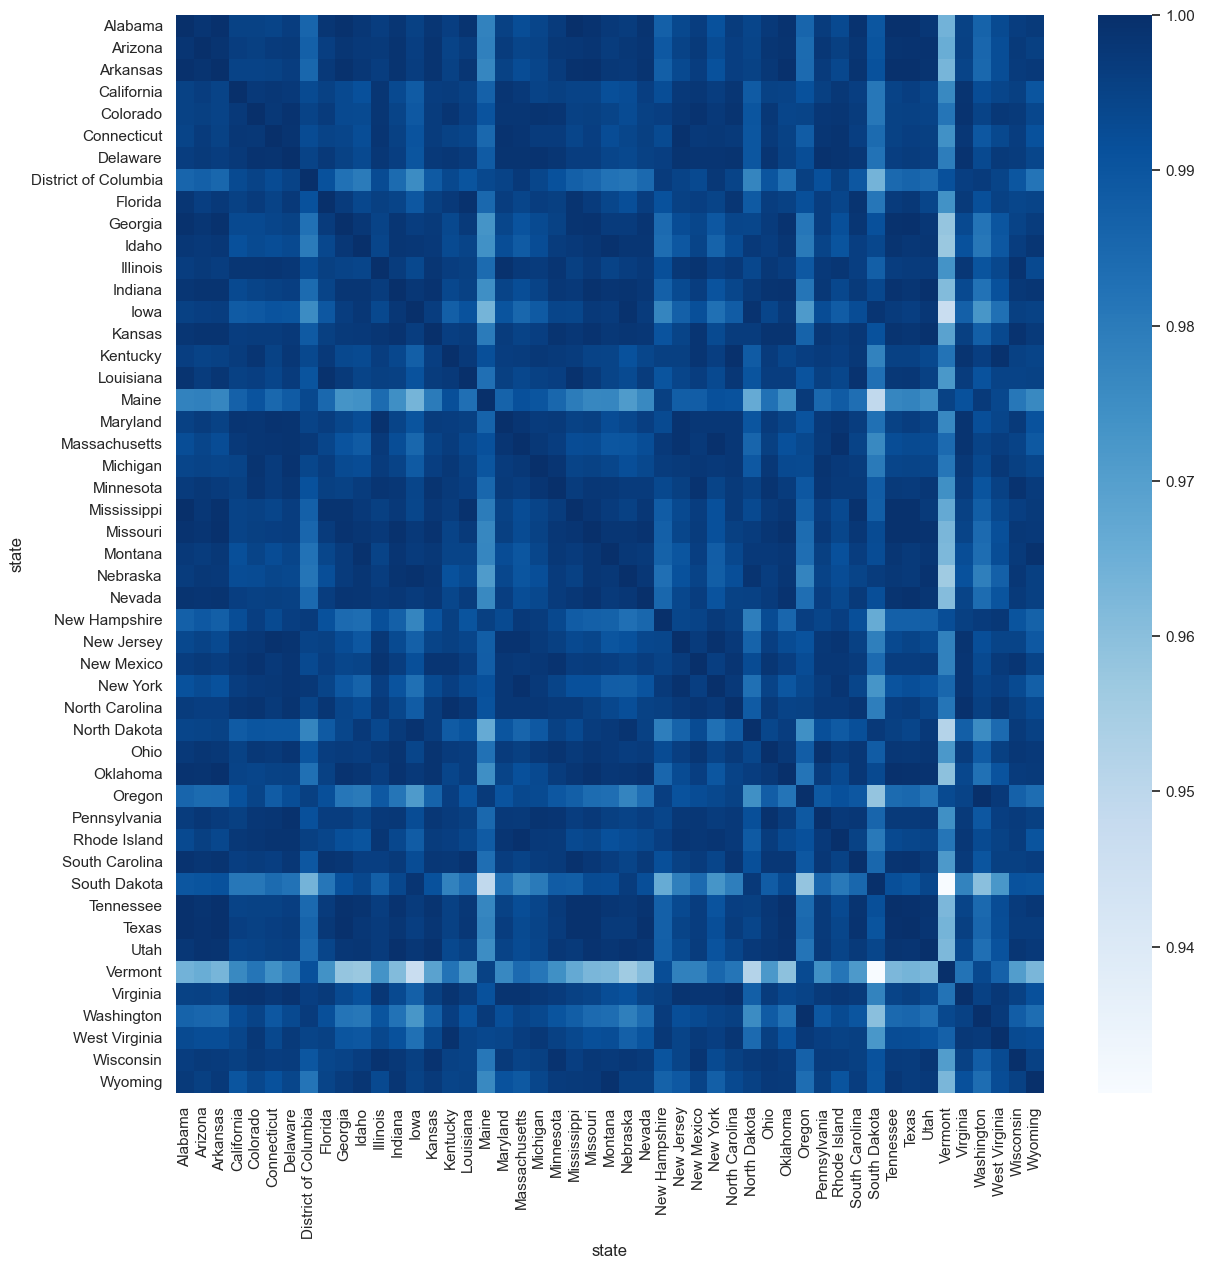

In [17]:
mainland_cases_statewise_corr_matrix = mainland_statewise_cases_df.corr()
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(mainland_cases_statewise_corr_matrix, xticklabels=mainland_cases_statewise_corr_matrix.columns, 
            yticklabels=mainland_cases_statewise_corr_matrix.columns, cmap="Blues")

<AxesSubplot: xlabel='state', ylabel='state'>

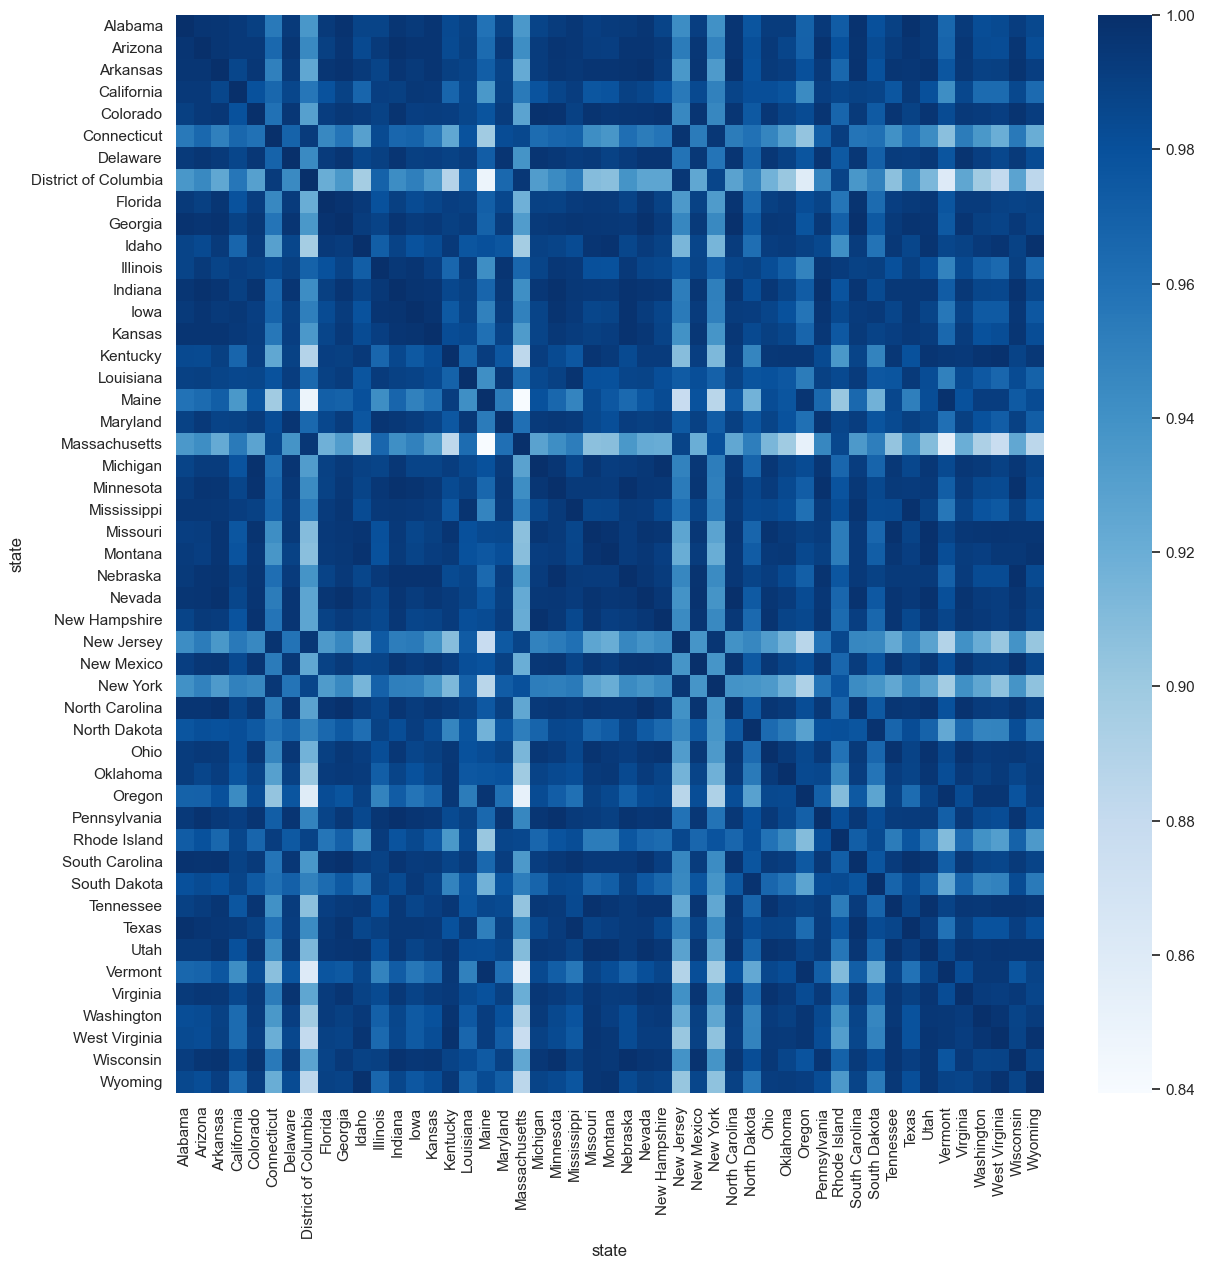

In [18]:
mainland_deaths_statewise_corr_matrix = mainland_statewise_deaths_df.corr()
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(mainland_deaths_statewise_corr_matrix, xticklabels=mainland_deaths_statewise_corr_matrix.columns, 
            yticklabels=mainland_deaths_statewise_corr_matrix.columns, cmap="Blues")